# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [1]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


C:\Users\nammr\anaconda3\envs\pj21\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 68
y_size = 68
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 40001
batch = 16

In [3]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36992)             3736192   
_________________________________________________________________
batch_normalization (BatchNo (None, 36992)             147968    
_________________________________________________________________
reshape (Reshape)            (None, 17, 17, 128)       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 34, 34, 64)        0

In [4]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
# discriminator.trainable = True
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 34, 34, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       204928    
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)            

In [5]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(nosie_size,))                    # input
dis_output = discriminator(generator(ginput))   # output
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 68, 68, 1)         4090881   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 243585    
Total params: 4,334,466
Trainable params: 4,016,769
Non-trainable params: 317,697
_________________________________________________________________


In [6]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_m_data.npy')
print(X_train.shape)    # (2205, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2205, 68, 68)


(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)
(128, 862)
(68, 68)


(2205, 68, 68)

In [7]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2331, 68, 68)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.18890941 / -80.0

  scale = MaxAbsScaler()
    #   절대값이 0~1사이에 매핑
    #   -1 ~ 1 사이로 재조정
  X_train = scale.fit_transform(X_train)
  print(X_train.shape)   # (2331, 4624)
  print(np.max(X_train), np.min(X_train))   # -0.0023613677 -1.0


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 68, 68, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan12.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            idx2 = np.random.randint(0, gen_imgs.shape[0])
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 68, 68, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            print(gen_mels.shape) # (862, 128)
            gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan12\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
            

gan_train(epochs, batch, 100)

end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

loss:0.1322  g_loss:8.6133
epoch:39534  d_loss:0.2949  g_loss:6.2623
epoch:39535  d_loss:0.1289  g_loss:5.4128
epoch:39536  d_loss:0.3187  g_loss:6.2460
epoch:39537  d_loss:0.1322  g_loss:8.7185
epoch:39538  d_loss:0.8313  g_loss:5.0603
epoch:39539  d_loss:0.0488  g_loss:5.1712
epoch:39540  d_loss:0.1459  g_loss:3.6397
epoch:39541  d_loss:0.1955  g_loss:5.0742
epoch:39542  d_loss:0.1295  g_loss:6.2377
epoch:39543  d_loss:0.2189  g_loss:6.1876
epoch:39544  d_loss:0.0700  g_loss:6.6128
epoch:39545  d_loss:0.0727  g_loss:6.1455
epoch:39546  d_loss:0.3598  g_loss:4.6178
epoch:39547  d_loss:0.2124  g_loss:5.1746
epoch:39548  d_loss:0.0811  g_loss:5.3568
epoch:39549  d_loss:0.4402  g_loss:4.9702
epoch:39550  d_loss:0.0397  g_loss:8.0550
epoch:39551  d_loss:0.1580  g_loss:7.4050
epoch:39552  d_loss:0.2193  g_loss:5.1678
epoch:39553  d_loss:0.0655  g_loss:4.4487
epoch:39554  d_loss:0.2764  g_loss:4.6154
epoch:39555  d_loss:0.1146  g_loss:6.3360
epoch:39556  d_loss:0.0657  g_loss:7.5082
epoch:3

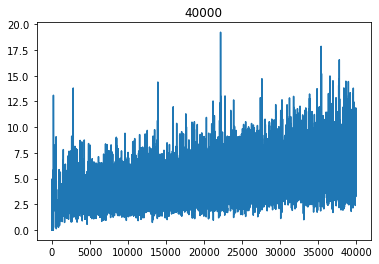

In [8]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan12.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

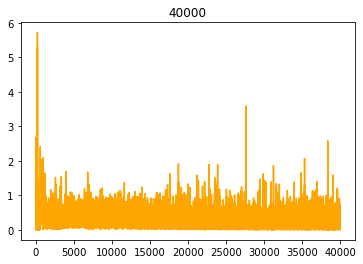

In [9]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()